In [39]:
#cd '/content/drive/MyDrive/Colab Notebooks/SKT_FLY_AI_4th/Week_3/Day_10'

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 시도1

## Data Get

In [41]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [42]:
#train = pd.read_csv('law_train.csv')
#test = pd.read_csv('law_test.csv')
train = pd.read_csv('/content/drive/MyDrive/skt/judgment/train.csv')
test = pd.read_csv('/content/drive/MyDrive/skt/judgment/test.csv')
train.head()

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [43]:
test.head()

,ID,first_party,second_party,facts
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa..."
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a..."


## Data Preprocessing

In [44]:
vectorizer = TfidfVectorizer()
def get_vector(vectorizer, df, train_mode):
    if train_mode:
        X_facts = vectorizer.fit_transform(df['facts'])
    else:
        X_facts = vectorizer.transform(df['facts'])
    X_party1 = vectorizer.transform(df['first_party'])
    X_party2 = vectorizer.transform(df['second_party'])

    X = np.concatenate([X_party1.toarray(), X_party2.toarray(), X_facts.toarray()], axis=1)
    return X

In [45]:
X_train = get_vector(vectorizer, train, True)
Y_train = train["first_party_winner"]
X_test = get_vector(vectorizer, test, False)

In [46]:
print(f'X_trian 차원 = {X_train.shape}')
print(f'Y_trian 차원 = {Y_train.shape}')
print(f'X_test 차원 = {X_test.shape}')

X_trian 차원 = (2478, 52377)
Y_trian 차원 = (2478,)
X_test 차원 = (1240, 52377)


In [47]:
vocab_size = len(X_train[0])
print(vocab_size)

52377


## Define Model & Train (Logistic Regression)

In [48]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [49]:
#submit = pd.read_csv('law_sample_submission.csv')
submit = pd.read_csv('/content/drive/MyDrive/skt/judgment/sample_submission.csv')

In [50]:
pred = model.predict(X_test)

In [51]:
submit['first_party_winner'] = pred
submit.to_csv('./baseline_submit.csv', index=False)

In [52]:
submit

,ID,first_party_winner
0,TEST_0000,1
1,TEST_0001,1
2,TEST_0002,1
3,TEST_0003,1
4,TEST_0004,1
...,...,...
1235,TEST_1235,0
1236,TEST_1236,1
1237,TEST_1237,1
1238,TEST_1238,1


## Define Model & Train (LSTM)

In [53]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MSE

In [54]:
model = Sequential()

model.add(LSTM(units=128, input_shape=(vocab_size, 1)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               66560     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 74881 (292.50 KB)
Trainable params: 74881 (292.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
78/78 [==============================] - 110s 1s/step - loss: 0.6479 - accuracy: 0.6630
Epoch 2/5
78/78 [==============================] - 106s 1s/step - loss: 0.6389 - accuracy: 0.6655
Epoch 3/5
78/78 [==============================] - 106s 1s/step - loss: 0.6397 - accuracy: 0.6655
Epoch 4/5
78/78 [==============================] - 106s 1s/step - loss: 0.6382 - accuracy: 0.6655
Epoch 5/5
78/78 [==============================] - 106s 1s/step - loss: 0.6392 - accuracy: 0.6655


In [56]:
pred = model.predict(X_test)

39/39 [==============================] - 22s 553ms/step


In [57]:
lstm_submit = submit

In [58]:
lstm_submit

,ID,first_party_winner
0,TEST_0000,1
1,TEST_0001,1
2,TEST_0002,1
3,TEST_0003,1
4,TEST_0004,1
...,...,...
1235,TEST_1235,0
1236,TEST_1236,1
1237,TEST_1237,1
1238,TEST_1238,1


In [59]:
l_model = Sequential()

l_model.add(LSTM(units=128, input_shape=(vocab_size, 1)))
l_model.add(Dropout(0.3))
l_model.add(Dense(units=64, activation='relu'))
l_model.add(Dropout(0.3))
l_model.add(Dense(units=1, activation='sigmoid'))
l_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

l_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 74881 (292.50 KB)
Trainable params: 74881 (292.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
#모델의 val_loss가 3epoch 동안 동일하면 학습을 중단

history = l_model.fit(X_train, Y_train, epochs=3, callbacks=[early_stopping])

Epoch 1/3
78/78 [==============================] - 106s 1s/step - loss: 0.6376 - accuracy: 0.6655
Epoch 2/3
78/78 [==============================] - 106s 1s/step - loss: 0.6411 - accuracy: 0.6655
Epoch 3/3
78/78 [==============================] - 106s 1s/step - loss: 0.6391 - accuracy: 0.6655


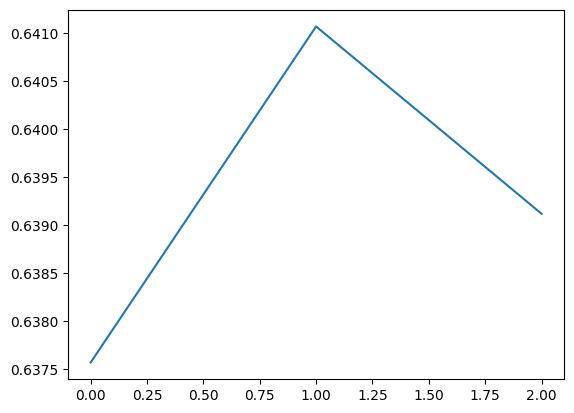

In [62]:
import matplotlib.pyplot as plt
myloss = l_model.history.history['loss']
plt.plot(range(len(myloss)), l_model.history.history['loss'])

In [63]:
pred = l_model.predict(X_test)

39/39 [==============================] - 22s 554ms/step


In [64]:
pred

array([[0.693596  ],
       [0.693596  ],
       [0.693596  ],
       ...,
       [0.693596  ],
       [0.693596  ],
       [0.69359565]], dtype=float32)

In [65]:
lstm_submit2 = submit
lstm_submit2['first_party_winner'] = pred

In [66]:
lstm_submit2

,ID,first_party_winner
0,TEST_0000,0.693596
1,TEST_0001,0.693596
2,TEST_0002,0.693596
3,TEST_0003,0.693596
4,TEST_0004,0.693596
...,...,...
1235,TEST_1235,0.693596
1236,TEST_1236,0.693596
1237,TEST_1237,0.693596
1238,TEST_1238,0.693596


In [67]:
lstm_submit2['first_party_winner'] = pred
lstm_submit.to_csv('lstm_submit.csv', index=False)

# 시도2

## 필요 패키지 import

In [88]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

## 데이터 로드

In [89]:
# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/skt/judgment/train.csv')
test = pd.read_csv('/content/drive/MyDrive/skt/judgment/test.csv')

## 데이터 전처리

In [90]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(train['facts'])
X_test_tfidf = vectorizer.transform(test['facts'])
Y_train = train["first_party_winner"]

# LSTM을 위한 텍스트 전처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['facts'])
X_train_seq = tokenizer.texts_to_sequences(train['facts'])
X_test_seq = tokenizer.texts_to_sequences(test['facts'])

# 시퀀스 패딩
max_sequence_length = max(len(seq) for seq in X_train_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

print(f'X_train_padded shape: {X_train_padded.shape}')
print(f'X_test_padded shape: {X_test_padded.shape}')

X_train_padded shape: (2478, 936)
X_test_padded shape: (1240, 936)


In [91]:
# 데이터 나누기
X_train_lstm, X_val_lstm, Y_train_lstm, Y_val_lstm = train_test_split(X_train_padded, Y_train, test_size=0.2, random_state=42)


## 모델 정의 및 학습

In [92]:
# LSTM 모델 정의
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
lstm_model.add(LSTM(units=128))
lstm_model.add(Dense(units=64, activation='relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(units=1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# LSTM 모델 학습
history = lstm_model.fit(X_train_lstm, Y_train_lstm, epochs=5, batch_size=32, validation_data=(X_val_lstm, Y_val_lstm))


Epoch 1/5
62/62 [==============================] - 11s 144ms/step - loss: 0.6459 - accuracy: 0.6655 - val_loss: 0.6412 - val_accuracy: 0.6613
Epoch 2/5
62/62 [==============================] - 6s 103ms/step - loss: 0.6362 - accuracy: 0.6665 - val_loss: 0.6457 - val_accuracy: 0.6613
Epoch 3/5
62/62 [==============================] - 7s 111ms/step - loss: 0.6412 - accuracy: 0.6665 - val_loss: 0.6416 - val_accuracy: 0.6613
Epoch 4/5
62/62 [==============================] - 6s 93ms/step - loss: 0.6375 - accuracy: 0.6670 - val_loss: 0.6405 - val_accuracy: 0.6613
Epoch 5/5
62/62 [==============================] - 4s 72ms/step - loss: 0.6387 - accuracy: 0.6670 - val_loss: 0.6408 - val_accuracy: 0.6613


## 모델 예측 및 csv 파일로 저장

In [93]:
## 모델 예측 및 평가

# LSTM 모델 예측
lstm_pred = lstm_model.predict(X_test_padded)
lstm_pred_binary = (lstm_pred > 0.5).astype(int)

# 결과를 submit DataFrame에 추가
submit['first_party_winner'] = lstm_pred_binary

# 결과 저장
submit.to_csv('./lstm_submit.csv', index=False)


39/39 [==============================] - 1s 16ms/step


In [94]:
submit.head(10)

,ID,first_party_winner
0,TEST_0000,1
1,TEST_0001,1
2,TEST_0002,1
3,TEST_0003,1
4,TEST_0004,1
5,TEST_0005,1
6,TEST_0006,1
7,TEST_0007,1
8,TEST_0008,1
9,TEST_0009,1


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['first_party_winner']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'first_party_winner'}, axis=1)
              .sort_values('first_party_winner', ascending=True))
  xs = counted['first_party_winner']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('first_party_winner', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('first_party_winner')
_ = plt.ylabel('count()')

In [95]:
unique_values = submit['first_party_winner'].head(10).unique()
unique_count = len(unique_values)

print(f"상위 10개 값: {unique_values}")
print(f"유니크한 값의 갯수: {unique_count}")

상위 10개 값: [1]
유니크한 값의 갯수: 1


In [97]:
## 성능 평가

# LSTM 모델 성능 평가
lstm_accuracy = accuracy_score(Y_val_lstm, (lstm_model.predict(X_val_lstm) > 0.5).astype(int))
print(f'LSTM Model Accuracy on Validation Set: {lstm_accuracy:.4f}')



16/16 [==============================] - 0s 29ms/step
LSTM Model Accuracy on Validation Set: 0.6613


## 예측 결과 시각화

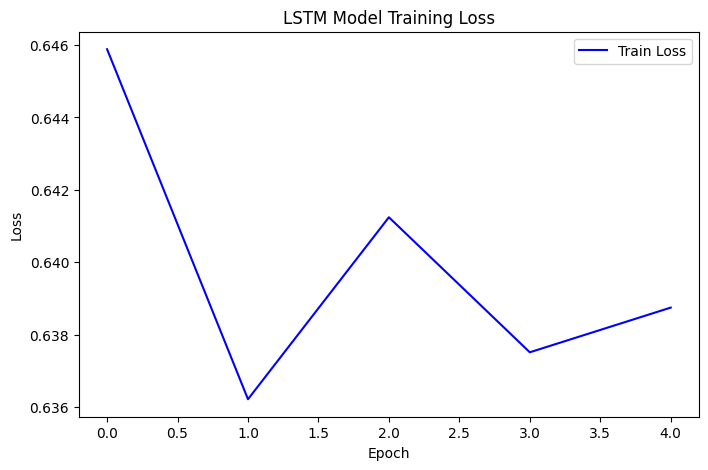

In [98]:
## 예측 결과 시각화

# LSTM 모델 학습 과정 시각화
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.title('LSTM Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()